In [261]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [262]:
data=pd.read_csv("/content/Fraud_check.csv")

In [263]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [264]:
data.shape

(600, 6)

In [265]:
data_new=data

In [266]:
#replacing all the rows with taxable income less than 30000 to 0 and taxable income more than 30000 with 1
data_new['Taxable.Income']=(data_new['Taxable.Income']>30000)*1

In [267]:
data_new

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,1,39492,7,YES
596,YES,Divorced,1,55369,2,YES
597,NO,Divorced,1,154058,0,YES
598,YES,Married,1,180083,17,NO


In [268]:
y=data_new['Taxable.Income']
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [269]:
y.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [270]:
x_df=data_new.drop(['Taxable.Income'],axis=1)

In [271]:
x_df=pd.get_dummies(x_df)

In [272]:
x=x_df.to_numpy()

In [273]:
x

array([[ 50047,     10,      1, ...,      1,      0,      1],
       [134075,     18,      0, ...,      0,      0,      1],
       [160205,     30,      1, ...,      0,      0,      1],
       ...,
       [154058,      0,      1, ...,      0,      0,      1],
       [180083,     17,      0, ...,      0,      1,      0],
       [158137,     16,      1, ...,      0,      1,      0]])

In [274]:
data_new['Taxable.Income'].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [275]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

# Building Decison Tree Classifier using Entropy Criteria

In [276]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'X[0] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [96, 384]'),
 Text(0.3, 0.625, 'X[1] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [13, 93]'),
 Text(0.2, 0.375, 'X[0] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [13, 68]'),
 Text(0.1, 0.125, 'entropy = 0.811\nsamples = 36\nvalue = [9, 27]'),
 Text(0.3, 0.125, 'entropy = 0.433\nsamples = 45\nvalue = [4, 41]'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.7, 0.625, 'X[0] <= 64532.5\nentropy = 0.764\nsamples = 374\nvalue = [83, 291]'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.375, 'X[5] <= 0.5\nentropy = 0.756\nsamples = 372\nvalue = [81, 291]'),
 Text(0.7, 0.125, 'entropy = 0.691\nsamples = 254\nvalue = [47, 207]'),
 Text(0.9, 0.125, 'entropy = 0.866\nsamples = 118\nvalue = [34, 84]')]

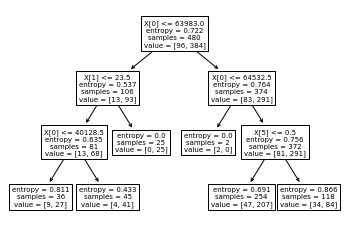

In [277]:
#plot the decision tree
tree.plot_tree(model)

In [278]:
colnames=list(x_df.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

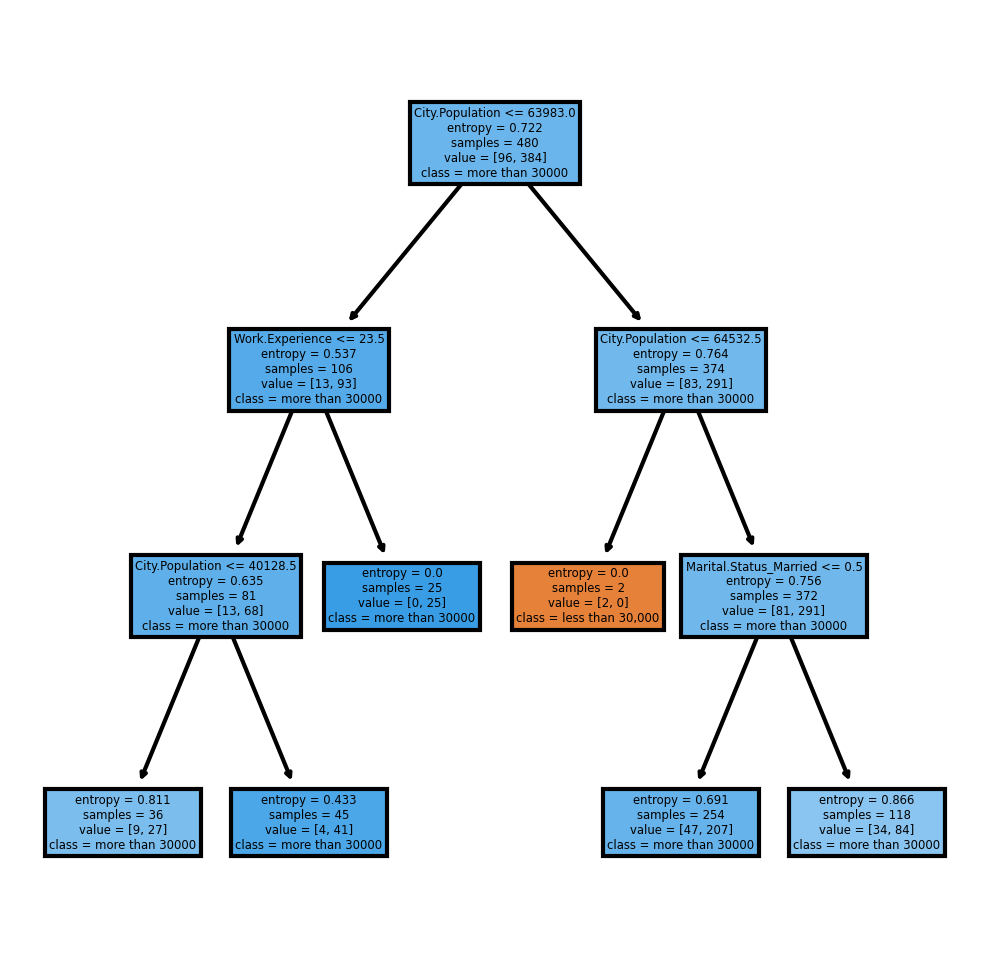

In [279]:
fn=['City.Population','Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES']
cn=['less than 30,000','more than 30000']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [280]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    120
dtype: int64

In [281]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [282]:
pd.crosstab(y_test,preds)

col_0,1
Taxable.Income,
0,28
1,92


In [283]:
np.mean(preds==y_test)

0.7666666666666667

# new decison tree model with depth=5

In [285]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Text(0.52, 0.9166666666666666, 'X[0] <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [96, 384]'),
 Text(0.3, 0.75, 'X[1] <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [13, 93]'),
 Text(0.26, 0.5833333333333334, 'X[0] <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [13, 68]'),
 Text(0.16, 0.4166666666666667, 'X[8] <= 0.5\nentropy = 0.811\nsamples = 36\nvalue = [9, 27]'),
 Text(0.08, 0.25, 'X[0] <= 36940.0\nentropy = 0.964\nsamples = 18\nvalue = [7, 11]'),
 Text(0.04, 0.08333333333333333, 'entropy = 0.779\nsamples = 13\nvalue = [3, 10]'),
 Text(0.12, 0.08333333333333333, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.24, 0.25, 'X[0] <= 31494.0\nentropy = 0.503\nsamples = 18\nvalue = [2, 16]'),
 Text(0.2, 0.08333333333333333, 'entropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(0.28, 0.08333333333333333, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.36, 0.4166666666666667, 'X[8] <= 0.5\nentropy = 0.433\nsamples = 45\nvalue = [4, 41]'),
 Text(0.32, 0.25, '

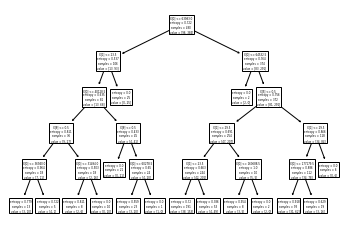

In [286]:
#plot the decision tree
tree.plot_tree(model)

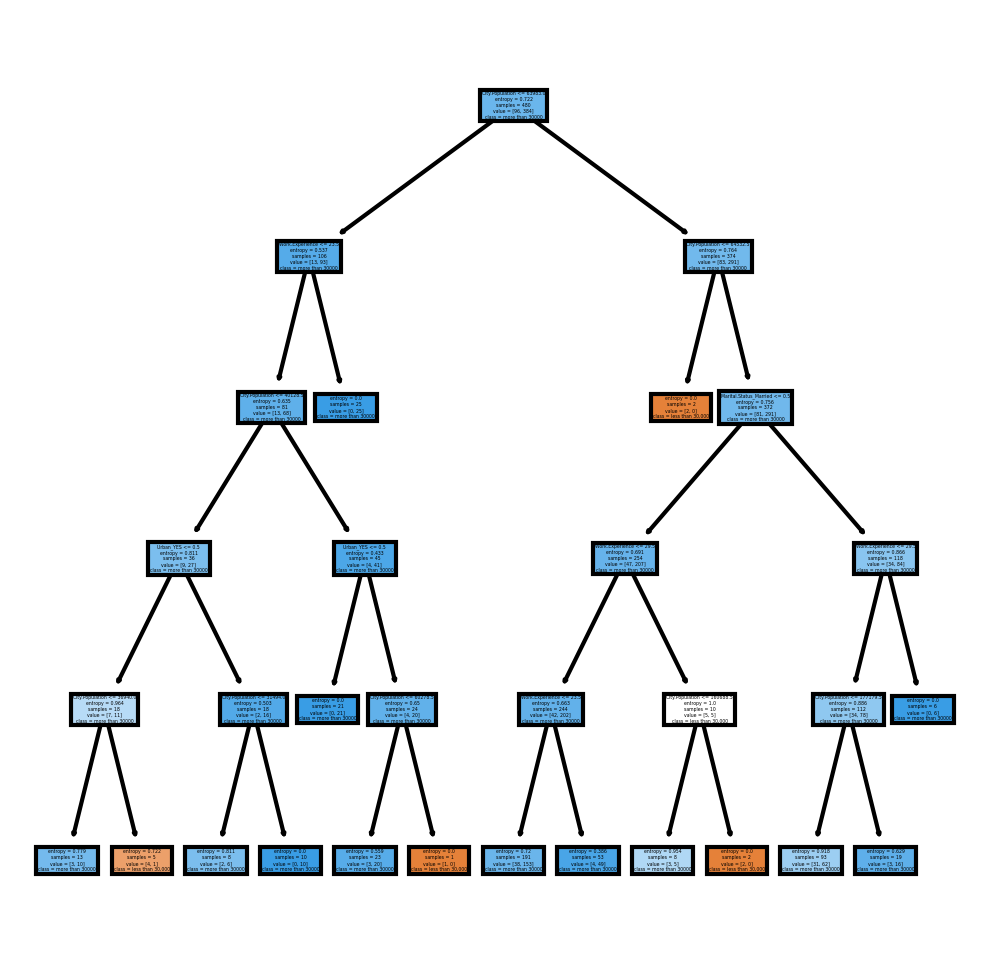

In [287]:
fn=['City.Population','Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES']
cn=['less than 30,000','more than 30000']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [288]:
preds1=model.predict(x_test)
pd.Series(preds1).value_counts()

1    117
0      3
dtype: int64

In [289]:
pd.crosstab(y_test,preds1)

col_0,0,1
Taxable.Income,,
0,1,27
1,2,90


In [290]:
np.mean(preds1==y_test)

0.7583333333333333

# CART splitting

In [291]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [292]:
model_gini.fit(x_train,y_train)
pred_cart=model_gini.predict(x_test)
np.mean(pred_cart==y_test)

0.7583333333333333